# DSCI 571: Supervised Machine Learning I 

## Introduction and Course Information 

UBC Master of Data Science program, 2020-21

Instructor: Varada Kolhatkar [[ʋəɾəda kɔːlɦəʈkər]](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet)

## Learning outcomes 

After going through this notebook you'll 

- be able to explain the motivation to study machine learning;
- be able to differentiate between supervised and unsupervised learning; 
- know how to navigate through the course material. 

### Outline 

1. [About me](#1)
2. [Supervised machine learning: Motivation](#2)
3. [About this course](#3) 
4. [Summary](#4)

## Slide settings 

In [1]:
# And import the libraries
import glob
import os
import random
import re
import sys
from collections import Counter, defaultdict
from io import BytesIO

import numpy as np
import pandas as pd
import requests

sys.path.append("./code/")
import IPython

# Plotting
import matplotlib.pyplot as plt
from image_classifier import classify_image
from IPython.display import HTML, display
from matplotlib.pyplot import imshow
from PIL import Image, ImageFile

%matplotlib inline
# pip install git+git://github.com/mgelbart/plot-classifier.git
from plot_classifier import plot_classifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

plt.rcParams["font.size"] = 16
sys.path.append("code/.")
pd.set_option("display.max_colwidth", 200)

In [2]:
from pathlib import Path

from traitlets.config.manager import BaseJSONConfigManager

path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
    "rise",
    {
        "theme": "serif",
        "transition": "fade",
        "start_slideshow_at": "selected",
        "width": "100%",
        "height": "100%",
        "header": "",
        "footer": "",
        "scroll": True,
        "enable_chalkboard": True,
        "slideNumber": True,
        "center": False,
        "controlsLayout": "edges",
        "slideNumber": True,
        "hash": True,
    },
)

In [3]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 130%;
}

body.rise-enabled div.inner_cell>div.input_area {
    font-size: 100%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 100%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>

## 1. Introduction <a name="1"></a>

### About me

- I am Varada Kolhatkar [[ʋəɾəda kɔːlɦəʈkər](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet)]
- If Varada is hard for you, you may call me **Ada**.
- I am an Assistant Professor of Teaching in Computer Science.
- I did my Ph.D. in Computational Linguistics at the University of Toronto. 
- I have been teaching for MDS since October 2018. 
- Contact information
    - Email: kvarada@cs.ubc.ca
    - Slack handle: @varada
    - GitHub Enterprise Handle (GHE): kvarada

## 2. Motivation <a name="2"></a>

### Prevalence of ML

Let's look at some examples. 

<img src="images/ml-examples.png" height="1200" width="1200"> 

- Image sources 
    - [Voice assistants](https://geeksfl.com/blog/best-voice-assistant/)
    - [Google News](https://news.google.com)    
    - [Recommendation systems](https://en.wikipedia.org/wiki/Recommender_system)
    - [Face Recognition source](https://startupleague.online/blog/3dss-tech-facial-recognition-technology/)
    - [Auto-completion](https://9to5google.com/2020/08/10/android-11-autofill-keyboard/)
    - [Stock market prediction](https://hbr.org/2019/12/what-machine-learning-will-mean-for-asset-managers)    
    - [Character recognition](https://en.wikipedia.org/wiki/Handwriting_recognition)    
    - [AlphaGo](https://deepmind.com/alphago-china)
    - [Self-driving cars](https://mc.ai/artificial-intelligence-in-self-driving-cars%E2%80%8A-%E2%80%8Ahow-far-have-we-gotten/)
    - [Drug discovery](https://www.nature.com/articles/d41586-018-05267-x)
    - [Cancer detection](https://venturebeat.com/2018/10/12/google-ai-claims-99-accuracy-in-metastatic-breast-cancer-detection/)

### What is machine learning (ML)?
<blockquote>
A field of study that gives computers the ability to learn without being explicitly programmed. <br> -- Arthur Samuel (1959)
</blockquote>

- ML is a different way to think about problem solving.

<img src="images/traditional-programming-vs-ML.png" height="800" width="800"> 

## Some concrete examples of supervised machine learning
## Example 1: Predict whether a patient has a liver disease or not

_Note: Do not worry about the code right now. Just focus on the input and output in each example._

In [4]:
# Data and output
# Download the CSV from: https://www.kaggle.com/uciml/indian-liver-patient-records
df = pd.read_csv("data/indian_liver_patient.csv")
df = df.drop("Gender", axis=1)
df["Dataset"] = df["Dataset"].replace(1, "Disease")
df["Dataset"] = df["Dataset"].replace(2, "No Disease")
df.rename(columns={"Dataset":"Target"}, inplace=True)
train_df, test_df = train_test_split(df, test_size=4, random_state=16)
HTML(train_df.head().to_html(index=False))

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
74,1.1,0.4,214,22,30,8.1,4.1,1.0,Disease
22,0.8,0.2,300,57,40,7.9,3.8,0.9,No Disease
13,0.7,0.1,182,24,19,8.9,4.9,1.2,Disease
40,0.9,0.2,285,32,27,7.7,3.5,0.8,Disease
50,1.2,0.4,282,36,32,7.2,3.9,1.1,Disease


In [5]:
# Build an ML model 
from xgboost import XGBClassifier
X_train = train_df.drop(columns=['Target'], axis=1)
y_train = train_df['Target']
X_test = test_df.drop(columns=['Target'], axis=1)
y_test = test_df['Target']
model = XGBClassifier()
model.fit(X_train, y_train);

In [6]:
# Predict on unseen data using the built model 
#pred_df = pd.DataFrame(
#    {"Predicted label": model.predict(X_test).tolist(), "Actual label": y_test.tolist()}
#)
pred_df = pd.DataFrame(
    {"Predicted target": model.predict(X_test).tolist()}
)

df_concat = pd.concat([X_test.reset_index(drop=True), pred_df], axis=1)
HTML(df_concat.to_html(index=False))

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Predicted target
61,0.7,0.2,145,53,41,5.8,2.7,0.87,Disease
42,11.1,6.1,214,60,186,6.9,2.8,2.80,Disease
22,0.8,0.2,198,20,26,6.8,3.9,1.30,No Disease
72,1.7,0.8,200,28,37,6.2,3.0,0.93,Disease


## Example 2: Predict the label of a given image 

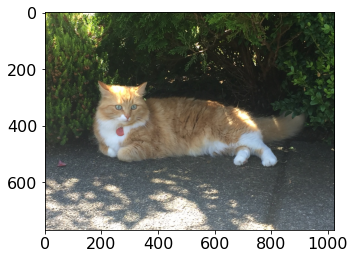

                          Class  Probability score
                      tiger cat           0.357164
               tabby, tabby cat           0.206793
                lynx, catamount           0.049392
 Pembroke, Pembroke Welsh corgi           0.046448


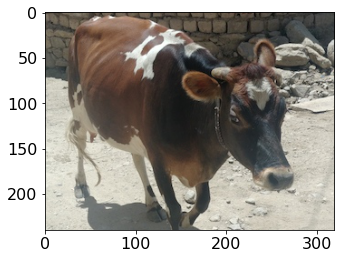

   Class  Probability score
      ox           0.869893
  oxcart           0.065034
  sorrel           0.028593
 gazelle           0.010053


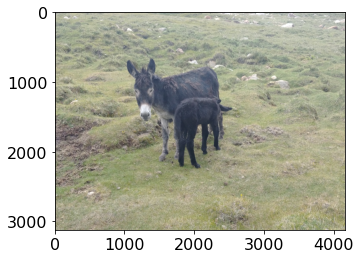

            Class  Probability score
            llama           0.123625
               ox           0.076333
           kelpie           0.071548
 ibex, Capra ibex           0.060569


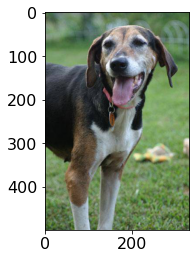

                         Class  Probability score
 Walker hound, Walker foxhound           0.577128
                   EntleBucher           0.088596
              English foxhound           0.085682
                        beagle           0.063373


In [7]:
# Predict labels with associated probabilities for unseen images  
images = glob.glob("data/test_images/*.*")
for image in images:
    img = Image.open(image)
    img.load()

    plt.imshow(img)
    plt.show()

    df = classify_image(img)
    print(df.to_string(index=False))

## Example 3: Predict sentiment expressed in a movie review (pos/neg)

In [24]:
# Data and output
# Download the data from here: https://www.kaggle.com/utathya/imdb-review-dataset
imdb_df = pd.read_csv("data/imdb_master.csv", encoding="ISO-8859-1")
imdb_df = imdb_df[imdb_df["label"].str.startswith(("pos", "neg"))]
imdb_df.drop(["Unnamed: 0", "type", 'file'], axis=1, inplace=True)
imdb_df.rename(columns={'label':'target'}, inplace=True)
train_df, test_df = train_test_split(imdb_df, test_size=0.10, random_state=12)
HTML(train_df.head().to_html(index=False))

review,target
"Just caught it at the Toronto International Film Festival. This is a good story, told in a compelling way. The handheld camera approach to action scenes added to the intensity of those scenes (in a documentary style, not a Blair Witch style). Joel Schumacher shows he doesn't need a big budget to produce a gripping film.<br /><br />The actors were strong, particularly the actor playing the focus of the events in the film, Boz.",pos
The movie itself made me want to go and call someone so they could enjoy it too. It was extremely funny. Angelena Jolie was wonderful as Juliet. The parents are hilarious.They are caterers as well as enemies.The kids play the parts of Romeo and Juliet in the church play.They fall in love and their parents try to keep them apart.(Spoiler Ahead. I think) They sneak off after a party and do it. Surprisingly they still want to get married in the end of the movie. If you don't like stereotypes and the defilement of classic literature don't watch. If you don't mind those you will have a blast watching this one.,pos
"I came across this movie on DVD purely by chance through a Blockbuster rental. Voyage to the Planets is an excellent BBC 2hour documentary/drama about a future ""grand tour"" of the solar system. Taking pains to adhere to current knowledge about the planets and space flight, and plausible extropolations from existing technology, this movie tells the story of astronauts on a journey to Venus, Mars, Jupiter, Saturn, and Pluto.<br /><br />The special effects are excellent for a TV show. I found the actors believable as astronauts. The situations presented are for the most part plausible, and you learn a lot about the science of the planets and spaceflight! Only two minor complaints: I found some of the situations and dialogue somewhat maudlin at times. Furthermore I am unsure that a single crew and ship would be sent on a single mission to see all those destinations at once time. More than likely, visits to Venus, Mars, Jupiter, etc. would/will be separate missions.<br /><br />They didn't try to skimp on this show with production values. The scenes of Venus and Mars were actually filmed in the northern deserts of Chile--the driest area on earth and a dead-ringer for the Martian landscape. Weightlessness sequences were filmed in a diving Russian transport jet. The producers could have fudged on either of these using studios and CGI, but chose the real thing instead.<br /><br />I would like to especially mention the marvelous music that was composed for this movie. Don Davis's thrilling theme is the first thing that grabs you when the movie starts, as the magnificent shot of the Pegasus passes the screen and David Suchet intones ""it is the destiny of man to explore the stars..."".<br /><br />Watching this on a small television screen is one regret I have. What a thrill to see this in a movie theatre, or even better an IMAX presentation!",pos
"Having seen Carlo Lizzani's documentary on Luchino Visconti, I was bound to higher expectations before watching this film made three years later by Adam Low. But the viewer like me did get dissatisfied... I faced a need for critical opinion, which I generally don't like giving due to the fact there are no documentaries that will satisfy every viewer. There are also no documentaries that will examine a theme totally. But when I read the reviews already written on this title, I also felt a bit confused. People sometimes don't know what to criticize. Therefore, to be clear, I'll divide this film into two major parts that differ considerably: the former one about Visconti before his director's career and latter one about Visconti the director. <br /><br />The aristocratic background, all the hobbies, the wealth that young Luchino experienced and enjoyed are clearly presented. His effort in horse racing is mentioned as well as his relation with his mother so much disturbed after his parents' divorce. We also get a very accurate idea of where Luchino 

In [25]:
# Build an ML model 
X_train, y_train = train_df['review'], train_df['target']
X_test, y_test = test_df['review'], test_df['target']

clf = Pipeline(
    [
        ("vect", CountVectorizer(max_features=5000)),
        ("clf", LogisticRegression(max_iter=5000)),
    ]
)
clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(max_features=5000)),
                ('clf', LogisticRegression(max_iter=5000))])

In [26]:
# Predict on unseen data using the built model
pred_dict = {
    "reviews": X_test[0:4],
    #"target": y_test[0:4],
    "sentiment_predictions": clf.predict(X_test[0:4]),
}
pred_df = pd.DataFrame(pred_dict)
pred_df.style.set_properties(**{"text-align": "left"})

,reviews,sentiment_predictions
34622,"I love horror movies that brings out a real amount of mystery like say ""silent hill"" ( which i found to be quite good, but still, was missing something ) and movies that keeps you guessing, this i thought was one of those movies. At first the movie starts out with some really good suspense and builds up a good starting point for a good horror scene, but after that it just rolls down the hill and from there it only goes faster and faster down. I mentioned silent hill at first for a reason because i can see a lot of ""stolen"" themes from that movie in here.. All in all i would say, watch silent hill instead of this one, its better, its more scary, it has a lot more suspense and also the ending is a lot better.. And best of all, you wont feel ripped off as i did with this one.. This just seems to be one of those ""i like that movie so I'm gonna re-make it in my own really bad version"" kinda movie.. Oh and one more thing... Lordi.. in a horror movie... thats like trying to scare a kid with a care bear who has ""hug me and i will love you forever"" written on the stomach of it..",pos
1163,"It seems that some viewers assume that the only thing which can make the viewer dislike this movie is the graphic violence. In fact violence, both disturbing and cartoonish, is the last of ""Oldboy""'s deep flaws. The characters are unidimensional, underdeveloped, primitive. The ""intensity"", an obsession and a goal in itself with this director, is served up with the cheapest of means. Let's not confuse a mindless shot of adrenaline with artistic worth. By the end of the movie, it seems that all the cards were exhausted so the script becomes almost inadvertently funny in its efforts to find new levels of ""horror"", to continue to ""shock"" an audience which is already numbed by the plethora of dumb soap-opera ""revelations"" already served up in big bunches. It would be hard to imagine anybody even vaguely familiar with the masterpieces of the last fifty years of Asian cinema being enthralled by this pompous piece of trash. Imagine Homer Simpson hesitating in front of the cinema theater: ""should I go in or should I buy five cones of ice-cream for the same money?"" Be smart, Homer, go for the ice-cream.",neg
7637,"I have seen this film 3 times. Mostly because I kept thinking while watching it, ""have I missed something here?"". Is there some reason this film was made? Was it trying to say something and I just missed it? Well after 3 viewings I failed to come up with an answer.I guess the worst thing I can say about any film is that it bored me, and I did not finish it. I will admit there is plenty of eye candy and fast editing and hip music to keep my attention all the way through but is that all a movie should be? I am not against extreme violence, it is almost non-stop, but it seems there should be some sort of inspiration. Something that is highlighted by it. The word gratuitous comes to mind but it is worse then that somehow. In the first part of the film we are all given insights into the motivations of the characters. And yes the 3 principles are very good in their roles. But the roles are completely unbelievable. So in the first part we get to know the characters, and in the second part most of em die and use sadistic glee in killing others. That seems to be the whole movie. And the first part has nothing to do with the second.For example. How could a nice smart guy like Zed agree to join a bunch of junkies and amateurs to do a job like this? It makes no sense. He is portrayed as smart, yet he goes ahead with this suicide mission. The fact that he survives is totally inconsistent with the rest of the hyper-real violence and mayhem. So what are we watching here a Hollywood romance with a happy ending or a super real, super violent blood bath? I recall having the same reaction to two other films this director was involved with: True Romance and Reservior Dogs.Needless dreck!",neg
7045,"For weeks I 

## Example 4: Predict housing prices

In [27]:
# Data: Input and output 
# Download the data from here: https://www.kaggle.com/harlfoxem/housesalesprediction
df = pd.read_csv("data/kc_house_data.csv")
df.drop(["id", "date"], axis=1, inplace=True)
df.rename(columns={'price':'target'},inplace=True)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=4)
HTML(train_df.head().to_html(index=False))

target,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
509000.0,2,1.50,1930,3521,2.0,0,0,3,8,1930.0,0,1989,0,98007,47.6092,-122.146,1840,3576
675000.0,5,2.75,2570,12906,2.0,0,0,3,8,2570.0,0,1987,0,98075,47.5814,-122.050,2580,12927
420000.0,3,1.00,1150,5120,1.0,0,0,4,6,800.0,350,1946,0,98116,47.5588,-122.392,1220,5120
680000.0,8,2.75,2530,4800,2.0,0,0,4,7,1390.0,1140,1901,0,98112,47.6241,-122.305,1540,4800
357823.0,3,1.50,1240,9196,1.0,0,0,3,8,1240.0,0,1968,0,98072,47.7562,-122.094,1690,10800


In [28]:
# Build a regression model 
import xgboost as xgb
from xgboost import XGBRegressor

X_train, y_train = train_df.drop("target", axis=1), train_df["target"]
X_test, y_test = test_df.drop("target", axis=1), train_df["target"]

model = XGBRegressor()
model.fit(X_train, y_train);

In [29]:
# Predict on unseen examples using the built model  
pred_df = pd.DataFrame(
    #{"Predicted target": model.predict(X_test[0:4]).tolist(), "Actual price": y_test[0:4].tolist()}
    {"Predicted target": model.predict(X_test[0:4]).tolist()}
)
df_concat = pd.concat([X_test[0:4].reset_index(drop=True), pred_df], axis=1)
HTML(df_concat.to_html(index=False))

bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Predicted target
4,2.25,2130,8078,1.0,0,0,4,7,1380.0,750,1977,0,98055,47.4482,-122.209,2300,8112,329256.15625
3,2.50,2210,7620,2.0,0,0,3,8,2210.0,0,1994,0,98052,47.6938,-122.130,1920,7440,592797.62500
4,1.50,1800,9576,1.0,0,0,4,7,1800.0,0,1977,0,98045,47.4664,-121.747,1370,9576,337229.93750
3,2.50,1580,1321,2.0,0,2,3,8,1080.0,500,2014,0,98107,47.6688,-122.402,1530,1357,567154.87500


## Questions to ponder on

- What are the inputs and outputs in the examples above? 
- What and how are we exactly "learning" in the above examples? In the image classification example, does the model have a concept of cats and dogs? 
- Are we expected to get correct predictions for all possible examples? What would it take to predict the correct label for an example the algorithm has not seen before?  
- How do we measure the success or failure of a machine learning model? In other words, if you want to use these program in the wild, how do you know how reliable it is?  
- What if the model mis-classifies an unseen example? For instance, what if the model incorrectly diagnoses a patient with not having disease when they actually have the disease? What would be the consequences? 
- Is it useful to know more fine-grained predictions (e.g., probability scores) rather than just a yes or a no?

## 3. About this course <a name="3"></a>

### Course learning outcomes 
By the end of this course you'll be able to answer most of the above questions. 

In particular, after successfully completing this course, you will be able to 

- describe supervised learning and identify what kind of tasks it is suitable for;
- explain common machine learning concepts such as classification and regression, data splitting, overfitting, parameters and hyperparameters, and the golden rule;
- identify when and why to apply data pre-processing techniques such as imputation, scaling, and one-hot encoding;
- describe at a high level how common machine learning algorithms work, including decision trees, K-nearest neighbours, and naive Bayes; 
- use Python and the `scikit-learn` package to responsibly develop end-to-end supervised machine learning pipelines on real-world datasets and to interpret your results carefully. 

### What we won't cover 

- I'll give you intuition of different ML algorithms but you won't be implementing the algorithms on your own. 
- Instead, we will focus on using them responsibly and interpreting the results carefully.   

### Types of machine learning 

Here are some typical learning problems. 

- **Supervised learning (this course)** ([Gmail spam filtering](https://support.google.com/a/answer/2368132?hl=en))
    - Training a model from input data and its corresponding targets to predict targets for new examples.     
- Unsupervised learning ([Google News](https://news.google.com/))
    - Training a model to find patterns in a dataset, typically an unlabeled dataset.
- Reinforcement learning ([AlphaGo](https://deepmind.com/research/case-studies/alphago-the-story-so-far))
    - A family of algorithms for finding suitable actions to take in a given situation in order to maximize a reward. 
- Recommendation systems ([Amazon item recommendation system](https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf))
    - Predict the "rating" or "preference" a user would give to an item.    

## Supervised learning

- Training data comprises a set of observations ($X$) and their corresponding targets ($y$). 
- We wish to find a model function $f$ that relates $X$ to $y$.
- Then use that model function to predict the targets of new examples. 

<img src="images/sup-learning.png" height="1000" width="1000"> 


## Unsupervised learning

- Training data consists of observations ($X$) without any corresponding targets.
- Unsupervised learning could be used to group similar things together in $X$. 
- More on this in DSCI 563.

<img src="images/unsup-learning.png" alt="" height="900" width="900"> 

### Supervised vs unsupervised questions

Which of these are examples of supervised learning?

1. Finding groups of similar properties in a real estate data set.
2. Predicting real estate prices based on house features like number of rooms, learning from past sales as examples.
3. Grouping articles on different topics from different news sources (something like Google News app). 
4. Detecting credit card fraud based on examples of fraudulent and non-fraudulent transactions.


## Map of ML courses in MDS 

<img src="images/MDS-ML-map.png" height="1500" width="1500"> 

## Course roadmap

- Week 1
    - Decision trees 
    - Fundamentals 
- Week 2
    - KNNs, SVMs with RBF Kernels
    - Preprocessing
- Week 3
    - Hyperparameter optimization, optimization bias
    - Naive Bayes
- Week 4
    - Logistic regression
    - Ensembles 

### Framework we will be using in this class 

- A number machine learning libraries are available.  
- We will be using `sklearn` libary, which is a popular ([41.6k stars on Github](https://github.com/scikit-learn/scikit-learn)) Machine Learning library for Python. 
- Go to your command prompt and install the library using one of the following commands. 

```
conda install scikit-learn
```

or 

```
pip install scikit-learn
```

In [27]:
# https://scikit-learn.org
url = "https://scikit-learn.org"
HTML("<iframe src=%s width=1000 height=650></iframe>" % url)

/Users/kvarada/opt/miniconda3/envs/571/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Organization: Lectures

**Here is what you need to do before each lecture:** 

- Watch the pre-recorded lecture videos for the lecture before the Q&A time.
- (Optional but highly recommended) Download the appropriate datasets provided in the course schedule and try to run the corresponding Jupyter notebook on your own. 
- Think about the embedded questions in the lecture notes on your own or with your colleagues. Time permitting, we'll discuss them during lecture time. 
- For each lecture I'll open an issue in the course repository as soon as the videos are available. Come up with a list of questions for discussion and post them as comments in the issue. 
- If your timezone is suitable, show up at the Q&A session to discuss the material you have learned. If not, I still encourage you to put your questions in the issue thread. Time permitting, we'll discuss them during the Q&A time and you can watch the recording later.

### Organization: Labs

**Here is what you need to do for labs:** 

- Similar to your block 1 labs, we'll work on Zoom in breakout rooms. 


### Communication

We are here to help you learn and succeed in the course and the program. Here is how we'll be communicating with each other in the course. 


#### Clarifications on the lecture notes/labs

If there is any clarification on the lecture material or lab questions, I'll open **an issue in the [course repository](https://github.ubc.ca/MDS-2020-21/DSCI_571_sup-learn-1_students) and tag you**. It is your responsibility to read the messages whenever you are tagged. (I know that there are too many things for you to keep track of. You do not have to read all the messages but please make sure to carefully read the messages whenever you are tagged.) 


#### Questions on lecture material or labs

If you have questions about the lecture material or lab questions please post them on the course Slack channel rather than direct messaging me or the TAs. Here are the advantages of doing so: 

- You'll get a quicker response. 
- Your classmates will benefit from the discussion. 
- Asking clear questions is a useful skill and this is an opportunity for you to practise it. 

#### Questions related to grading

For each deliverable, after I return grades, I'll let you know who has graded what by opening an issue in the course repository. If you have questions related to grading, please send a direct message to the appropriate TA on Slack and tag them. If you are unable to resolve the issue with the TA, include me in the conversation. 


#### Questions related to your personal situation, extensions, or talking about sensitive information

If you want to talk about anything sensitive, please direct message me on Slack and tag me (@varada) or email me (kvarada@cs.ubc.ca) rather than posting it on the course channel. It might take a while for me to get back to you, but I'll try my best to respond as soon as possible, depending upon the urgency of the matter. 

## 4. Summary <a name="4"></a>
- Machine learning is a different paradigm for problem solving.    
    - It reduces the time you spend programming and helps customizing and scaling your products.     
- In supervised learning we are given a set of observations ($X$) and their corresponding targets ($y$) and we wish to find a model function $f$ that relates $X$ to $y$.
- In unsupervised learning, we are given a set of observations ($X$) and we wish to group similar things together in $X$. 
- **The teaching team is here to help you learn the material and succeed in the program!**
- Let's have fun learning this material together :)!

## Attribution

Most of the lecture material in this course is adapted from the the material from previous offerings of the course. 